In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [2]:
root_dir = abspath(join(pardir, pardir))
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/no',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

In [4]:
root_data_dir = join(root_dir, 'Data')
name = 'no'
spectral_dir = join(root_data_dir, 'Color', name)
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files.sort()
spectral_files

['/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.325)_(0.335).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.335)_(0.345).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.345)_(0.355).hdf5',
 '/home2/s2

In [5]:
comp_dir = join(root_data_dir, "Completeness", "no")
comp_files = glob(join(comp_dir, "*.hdf5"))
comp_files.sort()
comp_files

['/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.325)_(0.335).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/no/comp_(0.335)_(0.345).hdf5',
 '/

In [6]:
data_dir = join(root_data_dir, 'Effective-Completeness')
safe_mkdir(data_dir)
data_dir = join(root_data_dir, 'Effective-Completeness', name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness/no already exist. Good to go!


In [7]:
index = 0
df_comp = vaex.open(comp_files[index])
df_comp

#,j,comp
0,2.058080808080808,0.0
1,2.1742424242424243,0.0
2,2.2904040404040407,0.0
3,2.4065656565656566,0.0
4,2.5227272727272725,0.0
...,...,...
94,12.977272727272727,0.9112809821635395
95,13.093434343434343,0.9167053364269142
96,13.20959595959596,0.9183357176919409
97,13.325757575757576,0.9146048522699975


<BarContainer object of 99 artists>

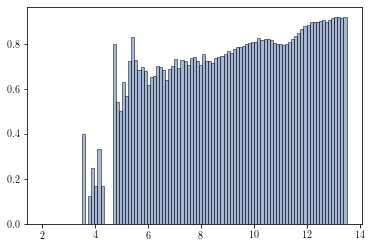

In [8]:
j = df_comp['j'].to_numpy()
dj = j[1] - j[0]
comp = df_comp['comp'].to_numpy()

plt.bar(j, comp, width=dj, alpha=0.5, edgecolor='k')

<BarContainer object of 99 artists>

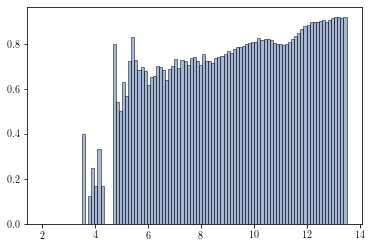

In [9]:
comp_interp = interpolate.interp1d(j, comp, kind='nearest-up', fill_value=0, bounds_error=False)

plt.bar(j, comp_interp(j), width=dj, alpha=0.5, edgecolor='k')

In [10]:
df_star = vaex.open(spectral_files[index])
# df_star = df_star.filter("abs(z) > 50").filter("abs(z) < 250")
# df_star = df_star.extract()
df_star

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,00032467-3557546,1,112,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800052642822266,2.1564118070290146,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,0.8730981349945068,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.9089173932493767,2.268240467308567
1,0.008917061681364228,-0.048279332675252175,6.333000183105469,6.209000110626221,AAA,2448569690198755840,38.3818473815918,38.23798058974192,0.03215809911489487,-3.320105645310672,0.02077770233154297,15.648562219917743,0.03183779865503311,6.871397018432617,7.007111549377441,6.608101844787598,716.1038818359375,1091.4459228515625,1.0634098052978516,1.1764565706253052,-1.4844818198754623,-1.0982041189149518,63.59870147705078,62.819698333740234,63.837398529052734,0.00039999998989515007,0.0,0.001500000013038516,nan,nan,nan,A,00020261-0245583,1,111,--,9.158726692199707,gaia,0.3001042306423187,0.3001042306423187,1.0,7234.37060546875,gspphot,3.57373046875,3.30517578125,0.0,4.155799865722656,gspphot,0.003200054168701172,0.00820016860961914,0.0,nan,--,nan,nan,nan,-1.3895000219345093,gspphot,0.062399983406066895,0.07220005989074707,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.12400007247924805,2.305372388159757,63.90363446471675,-56.8992413574995,29.08867186279142,33.346648213326496,-19.00440249032187,0.030476525523901784,0.023174072685925768,0.3001042306423187,-5.756494848419319,10.100807365547125,-0.013654361742468372,0.02252880254356858,-10.775183541282718,0.2672824782536821,-0.9565182768560057,0.13714615438495595,-10.145663157583355,0.025368455825438258,-0.08219332519347466,0.13664939098167272,1.030940493546873,2.4037811376311478
2,0.017169798689541858,0.2509584496833118,6.4629998207092285,6.3420000076293945,AAA,2768911028561373184,82.73104095458984,79.9700922599516,0.03658584877848625,-21.1945508376773,0.032072752714157104,12.846665601946027,0.030333148315548897,7.028295993804932,7.170999526977539,6.754446983337402,1664.38427734375,2524.64306640625,1.1126266717910767,1.177590012550354,-1.2921946921475476,-0.8189414254694577,77.58290100097656,77.27890014648438,77.88099670410156,0.005400000140070915,0.001500000013038516,0.0165999997407197

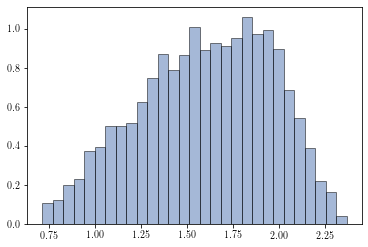

In [11]:
mj_sample = df_star['M_J'].to_numpy()
mj_edge = np.linspace(mj_sample.min(), mj_sample.max(), 30)
mj = (mj_edge[:-1]+mj_edge[1:])/2
rho_cmd, _ = np.histogram(mj_sample, bins=mj_edge, density=True)
dmj = mj_edge[1] - mj_edge[0]
plt.bar(mj, rho_cmd, width=dmj, alpha=0.5, edgecolor='k')
plt.show()

<BarContainer object of 29 artists>

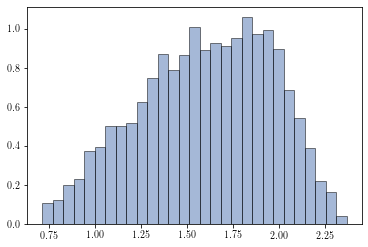

In [12]:
rho_interp = interpolate.interp1d(mj, rho_cmd, kind='nearest-up', fill_value=0, bounds_error=False)

plt.bar(mj, rho_interp(mj), width=dmj, alpha=0.5, edgecolor='k')

In [13]:
from scipy.stats import gaussian_kde

dm = np.linspace(-4, 15, 100)
Ddm = dm[1] - dm[0]
comp_dm = np.empty(len(dm))
for i, dm_i in enumerate(dm):
    comp_dm_i = np.sum(comp_interp(j)*rho_interp(j-dm_i))*dj
    comp_dm[i] = comp_dm_i

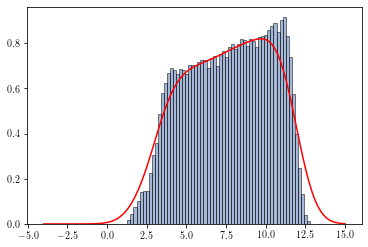

In [14]:
from scipy.stats import norm

def density(x, xi, wi, h=1):
    return np.sum(wi[:, None]*norm.pdf(x[None, :], xi[:, None], h), axis=0)
w = comp_dm/np.sum(comp_dm)
area = np.trapz(comp_dm, dm)

plt.bar(dm, comp_dm, width=Ddm, alpha=0.5, edgecolor='k')
plt.plot(dm, density(dm, dm, w, h=Ddm*5)*area, 'r-')
plt.show()

# For all 

comp_(-0.019)_(0.127).hdf5


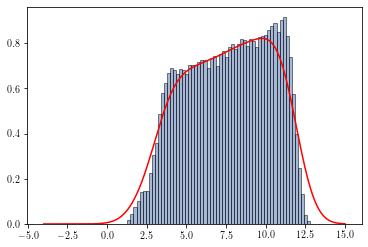

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.127)_(0.190).hdf5


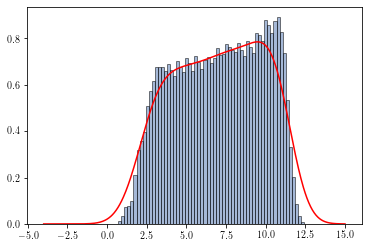

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.190)_(0.220).hdf5


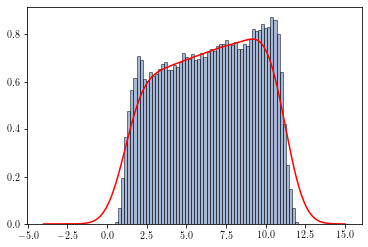

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.220)_(0.242).hdf5


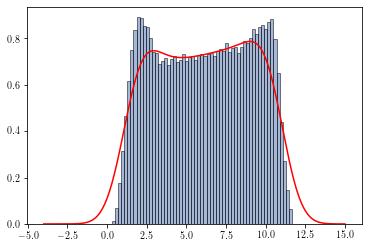

export(hdf5) [########################################] 100.00% elapsed time  :     0.26s =  0.0m =  0.0h
 comp_(0.242)_(0.260).hdf5


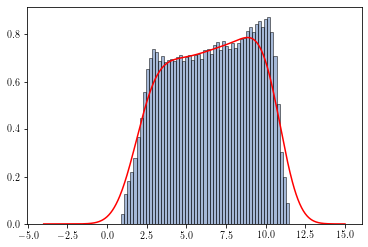

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.260)_(0.276).hdf5


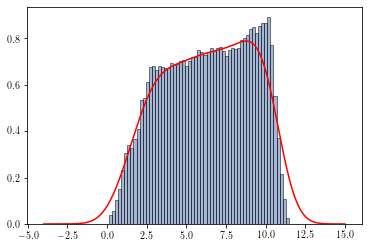

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.276)_(0.289).hdf5


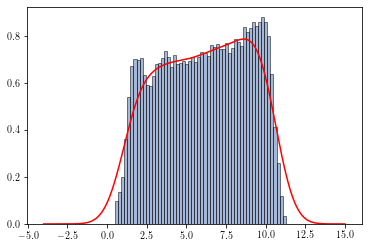

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.289)_(0.301).hdf5


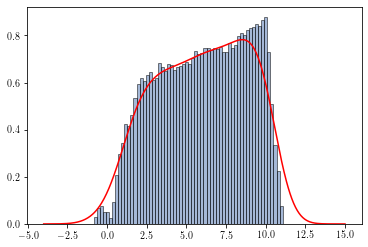

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.301)_(0.313).hdf5


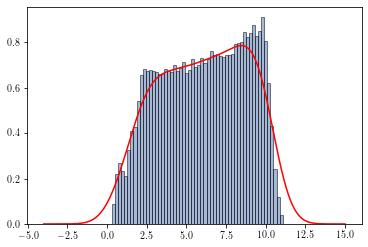

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.313)_(0.325).hdf5


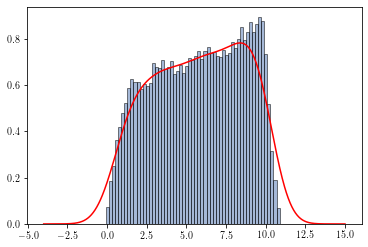

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.325)_(0.335).hdf5


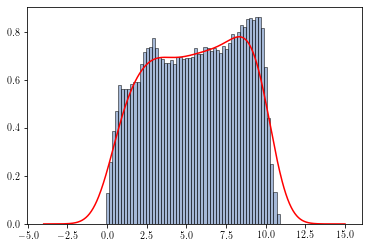

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.335)_(0.345).hdf5


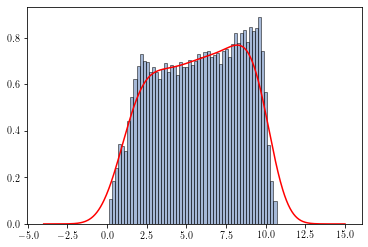

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.345)_(0.355).hdf5


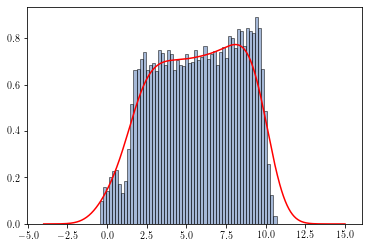

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.355)_(0.365).hdf5


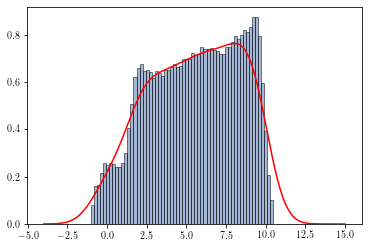

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.365)_(0.374).hdf5


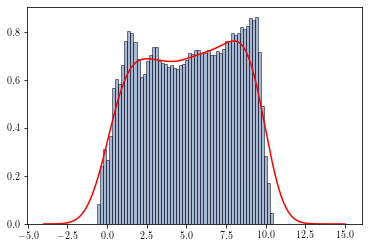

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [15]:
from scipy.stats import norm

def density(x, xi, wi, h=1):
    return np.sum(wi[:, None]*norm.pdf(x[None, :], xi[:, None], h), axis=0)

dm = np.linspace(-4, 15, 100)
Ddm = dm[1] - dm[0]
comp_dm = np.empty(len(dm))

for index, comp_file in enumerate(comp_files):
    name = comp_file.split('/')[-1]
    print(name)
    df_comp = vaex.open(comp_file)
    j = df_comp['j'].to_numpy()
    dj = j[1] - j[0]
    comp = df_comp['comp'].to_numpy()
    comp_interp = interpolate.interp1d(j, comp, kind='nearest-up', fill_value=0, bounds_error=False)

    df_star = vaex.open(spectral_files[index])
    # df_star = df_star.filter("abs(z) > 100").filter("abs(z) < 200")
    # df_star = df_star.extract()
    mj_sample = df_star['M_J'].to_numpy()
    mj_edge = np.linspace(mj_sample.min(), mj_sample.max(), 30)
    mj = (mj_edge[:-1]+mj_edge[1:])/2
    rho_cmd, _ = np.histogram(mj_sample, bins=mj_edge, density=True)
    dmj = mj_edge[1] - mj_edge[0]
    rho_interp = interpolate.interp1d(mj, rho_cmd, kind='nearest-up', fill_value=0, bounds_error=False)

    
    for i, dm_i in enumerate(dm):
        comp_dm_i = np.sum(comp_interp(j)*rho_interp(j-dm_i))*dj
        comp_dm[i] = comp_dm_i
    w = comp_dm/np.sum(comp_dm)
    area = np.trapz(comp_dm, dm)

    plt.bar(dm, comp_dm, width=Ddm, alpha=0.5, edgecolor='k')
    dmx = np.linspace(-4, 15, 500)
    plt.plot(dmx, density(dmx, dm, w, h=dj*8)*area, 'r-')
    plt.show()
    df = vaex.from_arrays(dm=dm, comp=density(dm, dm, w, h=dj*8)*area)
    df.export(join(data_dir, name), progress=True)
    # break

In [63]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no'